In [1]:
#Include the UNSflow libraries
#Pkg.clone("git://github.com/KiranUofG/UNSflow")
include("../src/UNSflow.jl")
using UNSflow

Case 8 from the new paper
#### Table 1
|--|--|
|:----:|:-------:|
|Airfoil|SD-7003|
|Motion|Eldredge ramp|
|Smoothing parameter a|0.8|
|Amplitude|30 deg|
|Pivot point| 0.25|
|Nondim. pitch rate k|0.40|
|Reynolds number| 20k|
|LESP| 0.25|

In [2]:
# Insert stating constants
    # static constants from exp. data for Re = 300k

    sepdef = SeparationParams(10., 7., 2.3,"Sheng")

    alphadef = EldUptstartDef(30.*pi/180.,0.4, 0.8, 5.)
    hdef = ConstDef(0.)
    udef = ConstDef(1.) #Freestream velocity is a constant. Set as constant = 1

    #The full kinematics are collected as:
    full_kinem = KinemDef(alphadef, hdef, udef)

    pvt = 0.25 #QC
    lespcrit = [0.17;] #Note that the value is entered as an array. 
    dtstar = find_tstep(alphadef)
    time_total =7.
    nsteps = Int(round(time_total/dtstar))

933

In [3]:
# The argument "FlatPlate" provides zero camber. To use an airfoil, specify the coordinate file which should be
#in the same folder. For eg. "sd7003.dat". 
#The XFOIL convention must be used for the coordinate: TE->Upper surface->LE->Lower surface->TE
surf = TwoDSurf("sd7003_fine.dat", pvt, full_kinem,lespcrit)
curfield = TwoDFlowField()

#Now the code is run as :
#The variables mat, surf and curfield are returned
        
@time mat1, surf, curfield = ldvm_klb_tr(surf, curfield,sepdef, nsteps, dtstar);


113.212863 seconds (12.32 M allocations: 698.282 MB, 1.39% gc time)


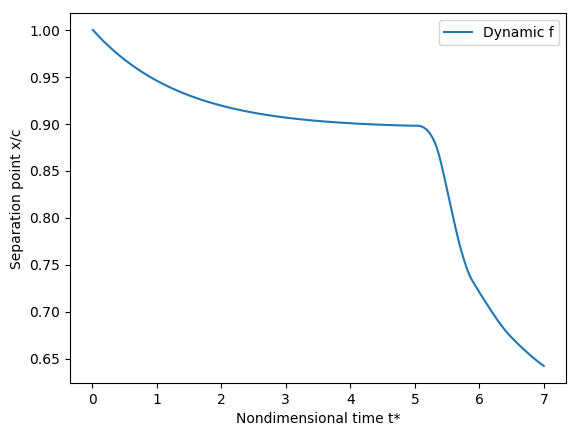

PyObject <matplotlib.legend.Legend object at 0x000000001CBF0860>

In [4]:
plot(mat1[:,1],mat1[:,10],label="Dynamic f")

xlabel("Nondimensional time t*")
ylabel("Separation point x/c")
legend()

In [5]:
data = readdlm("comp_sa_lesp8.dat");

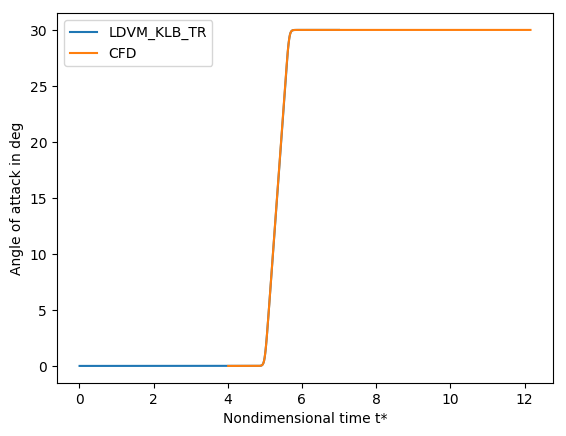

PyObject <matplotlib.legend.Legend object at 0x000000001CFBE240>

In [6]:
plot(mat1[:,1],mat1[:,2]*180/pi,label="LDVM_KLB_TR")
plot(data[:,1]+4,data[:,2], label= "CFD")
xlabel("Nondimensional time t*")
ylabel("Angle of attack in deg")
legend()

Data from CFD and LDVM_KLB_TR is synchronized.

In [7]:
# The argument "FlatPlate" provides zero camber. To use an airfoil, specify the coordinate file which should be
#in the same folder. For eg. "sd7003.dat". 
#The XFOIL convention must be used for the coordinate: TE->Upper surface->LE->Lower surface->TE
surf = TwoDSurf("sd7003_fine.dat", pvt, full_kinem,lespcrit)
curfield = TwoDFlowField()

#Now the code is run as :
#The variables mat, surf and curfield are returned
        
@time matldvm, surf, curfield = ldvm(surf, curfield, nsteps, dtstar);

 67.820473 seconds (999.55 k allocations: 228.631 MB, 0.25% gc time)


In [8]:
rmsL_1 = rms(data[:,1]+4,data[:,5],mat1[:,1],mat1[:,6])
rmsD_1 = rms(data[:,1]+4,data[:,6],mat1[:,1],mat1[:,7])
rmsM_1 = rms(data[:,1]+4,data[:,7],mat1[:,1],mat1[:,8])

0.8687943590653872

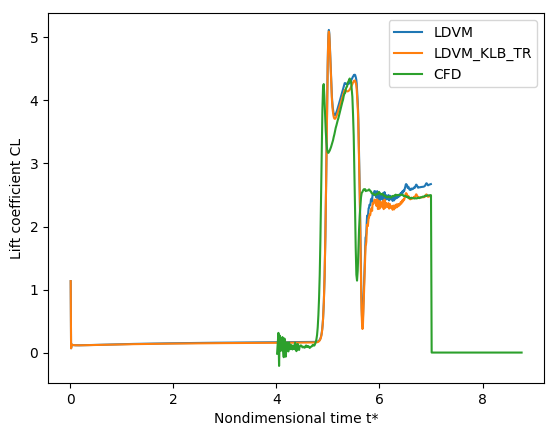

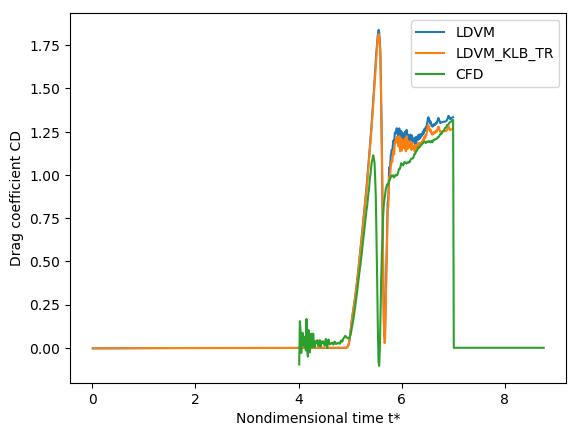

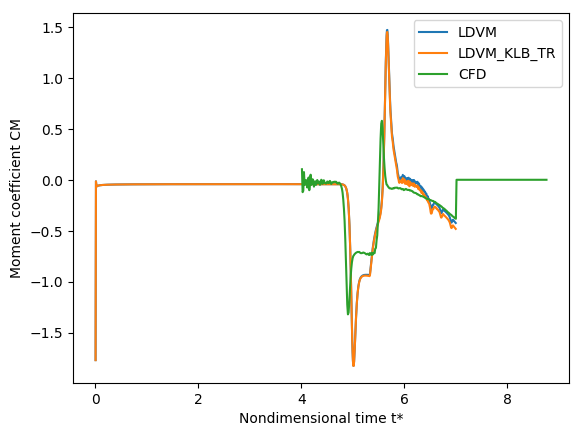

PyObject <matplotlib.legend.Legend object at 0x000000001D4D6B70>

In [9]:
plot(matldvm[:,1],matldvm[:,6],label="LDVM")
plot(mat1[:,1],mat1[:,6],label="LDVM_KLB_TR")
plot(data[1:368,1]+4,data[1:368,5], label="CFD")
xlabel("Nondimensional time t*")
ylabel("Lift coefficient CL")
legend()
figure()
plot(matldvm[:,1],matldvm[:,7],label="LDVM")
plot(mat1[:,1],mat1[:,7],label="LDVM_KLB_TR")
plot(data[1:368,1]+4,data[1:368,6], label="CFD")
xlabel("Nondimensional time t*")
ylabel("Drag coefficient CD")
legend()
figure()
plot(matldvm[:,1],matldvm[:,8],label="LDVM")
plot(mat1[:,1],mat1[:,8],label="LDVM_KLB_TR")
plot(data[1:368,1]+4,-data[1:368,7], label="CFD")
xlabel("Nondimensional time t*")
ylabel("Moment coefficient CM")
legend()

In [10]:
# Insert stating constants
    # static constants have been obtained iteratively, so as to give the best fsep prediction
    # fsep prediction was compared to experiment

    #Note how different they are from static constants from 2.3.
    #In my opinion the reason for that is low Reynolds number for this case.

    sepdef = SeparationParams(12.6, 1.71, 1.92,"Sheng",cs_model="continuous")

    alphadef = EldUptstartDef(30.*pi/180.,0.4, 0.8, 5.)
    hdef = ConstDef(0.)
    udef = ConstDef(1.) #Freestream velocity is a constant. Set as constant = 1

    #The full kinematics are collected as:
    full_kinem = KinemDef(alphadef, hdef, udef)

    pvt = 0.25 #QC
    lespcrit = [0.17;] #Note that the value is entered as an array. 
    dtstar = find_tstep(alphadef)
    time_total =7.
    nsteps = Int(round(time_total/dtstar))

# The argument "FlatPlate" provides zero camber. To use an airfoil, specify the coordinate file which should be
#in the same folder. For eg. "sd7003.dat". 
#The XFOIL convention must be used for the coordinate: TE->Upper surface->LE->Lower surface->TE
surf = TwoDSurf("sd7003_fine.dat", pvt, full_kinem,lespcrit)
curfield = TwoDFlowField()

#Now the code is run as :
#The variables mat, surf and curfield are returned
        
@time mat, surf, curfield = ldvm_klb_tr(surf, curfield,sepdef, nsteps, dtstar);


 64.815870 seconds (823.62 k allocations: 221.836 MB, 0.21% gc time)


In [11]:
rmsL_2 = rms(data[:,1]+4,data[:,5],mat[:,1],mat[:,6])
rmsD_2 = rms(data[:,1]+4,data[:,6],mat[:,1],mat[:,7])
rmsM_2 = rms(data[:,1]+4,data[:,7],mat[:,1],mat[:,8])

rmsL_ldvm = rms(data[:,1]+4,data[:,5],matldvm[:,1],matldvm[:,6])
rmsD_ldvm = rms(data[:,1]+4,data[:,6],matldvm[:,1],matldvm[:,7])
rmsM_ldvm = rms(data[:,1]+4,data[:,7],matldvm[:,1],matldvm[:,8])

0.860264506555116

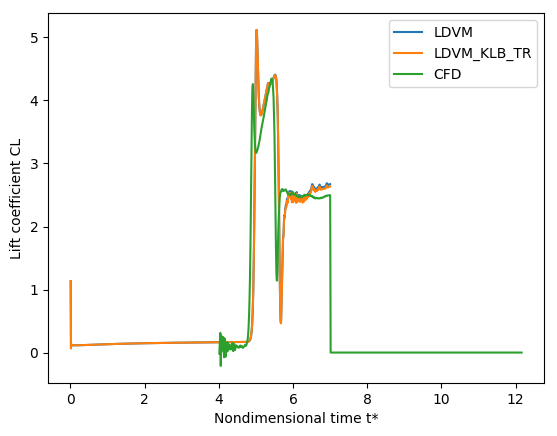

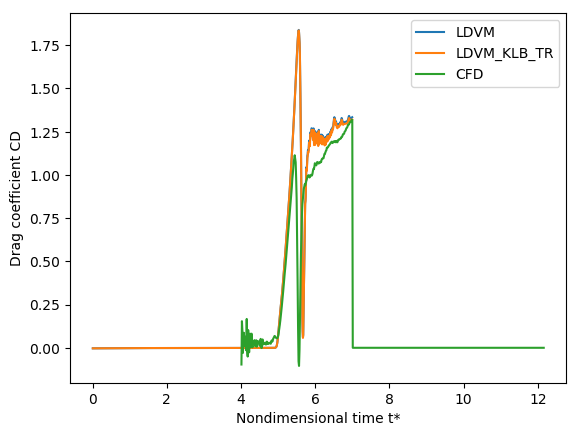

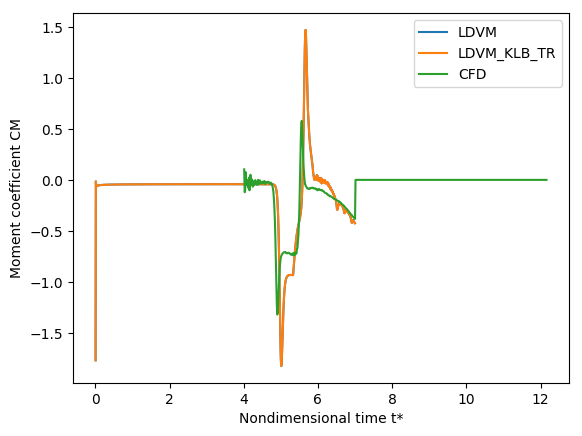

PyObject <matplotlib.legend.Legend object at 0x00000000253152E8>

In [12]:
plot(matldvm[:,1],matldvm[:,6],label="LDVM")
plot(mat[:,1],mat[:,6],label="LDVM_KLB_TR")
plot(data[:,1]+4,data[:,5], label="CFD")
xlabel("Nondimensional time t*")
ylabel("Lift coefficient CL")
legend()
figure()
plot(matldvm[:,1],matldvm[:,7],label="LDVM")
plot(mat[:,1],mat[:,7],label="LDVM_KLB_TR")
plot(data[:,1]+4,data[:,6], label="CFD")
xlabel("Nondimensional time t*")
ylabel("Drag coefficient CD")
legend()
figure()
plot(matldvm[:,1],matldvm[:,8],label="LDVM")
plot(mat[:,1],mat[:,8],label="LDVM_KLB_TR")
plot(data[:,1]+4,-data[:,7], label="CFD")
xlabel("Nondimensional time t*")
ylabel("Moment coefficient CM")
legend()

In [13]:
[rmsL_1 rmsL_2 rmsL_ldvm]

1×3 Array{Float64,2}:
 0.820494  0.821269  0.821794

In [14]:
[rmsD_1 rmsD_2 rmsD_ldvm]

1×3 Array{Float64,2}:
 0.327244  0.333922  0.335341

In [15]:
[rmsM_1 rmsM_2 rmsM_ldvm]

1×3 Array{Float64,2}:
 0.868794  0.860521  0.860265